# Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('final.csv')

In [16]:
df.drop(['Customer_ID','Type_of_Loan'],axis=1,inplace=True)

In [17]:
df.head().T

,0,1,2,3,4
Age,23.0,23.0,23.0,23.0,23.0
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0
Num_Credit_Card,4.0,4.0,4.0,4.0,4.0
Num_of_Delayed_Payment,7.0,6.0,7.0,4.0,6.0
Credit_Utilization_Ratio,26.82262,31.94496,28.609352,31.377862,24.797347
Payment_of_Min_Amount,No,No,No,No,No
Total_EMI_per_month,49.574949,49.574949,49.574949,49.574949,49.574949
Credit_Score,Good,Good,Good,Good,Good
Delay_from_due_date,3,-1,3,5,6


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          100000 non-null  float64
 1   Annual_Income                100000 non-null  float64
 2   Num_Bank_Accounts            100000 non-null  float64
 3   Num_Credit_Card              100000 non-null  float64
 4   Num_of_Delayed_Payment       100000 non-null  float64
 5   Credit_Utilization_Ratio     100000 non-null  float64
 6   Payment_of_Min_Amount        100000 non-null  object 
 7   Total_EMI_per_month          100000 non-null  float64
 8   Credit_Score                 100000 non-null  object 
 9   Delay_from_due_date          100000 non-null  int64  
 10  Credit_History_Age_Formated  100000 non-null  float64
 11  Auto_Loan                    100000 non-null  int64  
 12  Credit-Builder_Loan          100000 non-null  int64  
 13  

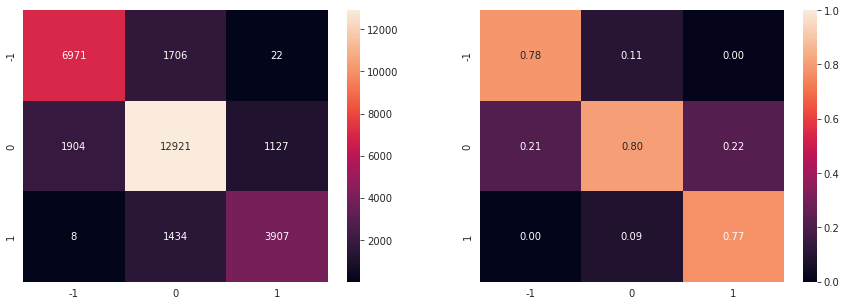

In [13]:
with sns.axes_style('white'):
    fig, ax =plt.subplots(1,2, figsize=(15, 5))
    sns.heatmap(conf, annot = True, fmt = '.0f',  ax=ax[0])
    sns.heatmap(conf_p, annot = True, fmt = '.2f', vmin=0, vmax=1,  ax=ax[1])